# Human Data Wrangling

This is a simple demonstration of the basic, high level functionality of the tools offered in `human_aware_rl/human/process_dataframes.py`. This notebook is far from complete, and is certainly not official documentation. However, it will hopefully provide a very hands-on introduction to this portion of the codebase, and can serve as a jumping-off point for further exploration and analysis on the user's end

In [1]:
%matplotlib inline
%matplotlib notebook
import tqdm, copy
import random, os
import pandas as pd
from tqdm import trange
import matplotlib.pyplot as plt
from collections import defaultdict
from overcooked_ai_py.utils import save_pickle
from human_aware_rl.utils import set_global_seed
from human_aware_rl.human.process_dataframes import *
from human_aware_rl.static import *

set_global_seed(1884)

# Loading + Formatting

In [69]:
old_trials = pd.read_csv(RAW_2019_HUMAN_DATA, header=0)
new_trials = pd.read_csv(RAW_2020_HUMAN_DATA, header=0)

In [70]:
new_main_trials = format_trials_df(all_trials, False)

Layouts found ['asymmetric_advantages_tomato' 'counter_circuit' 'cramped_corridor'
 'inverse_marshmallow_experiment' 'marshmallow_experiment'
 'marshmallow_experiment_coordination' 'soup_coordination'
 'you_shall_not_pass']


In [71]:
new_main_trials.head()

,state,joint_action,reward,time_left,score,time_elapsed,cur_gameloop,layout,layout_name,trial_id,player_0_id,player_1_id,player_0_is_human,player_1_is_human,cur_gameloop_total,score_total,button_press,button_press_total,timesteps_since_interact,button_presses_per_timstep
0,"{""players"": [{""position"": [8, 3], ""orientation...","[[0, 0], [0, 0]]",0,59.998593,0,0.001410,1,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"",...",marshmallow_experiment,A2GV9WSNSPX53:3WI0P0II66Z0WYO9ANJQKHY9WWQRDM16...,5eb1a58552c046c89a43054113ba3487,776ab6cf4a6a401c873722de999e6d18,True,True,396,369,0,253,0,0.638889
1,"{""players"": [{""position"": [8, 3], ""orientation...","[[0, 0], [0, 0]]",0,59.847521,0,0.152482,2,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"",...",marshmallow_experiment,A2GV9WSNSPX53:3WI0P0II66Z0WYO9ANJQKHY9WWQRDM16...,5eb1a58552c046c89a43054113ba3487,776ab6cf4a6a401c873722de999e6d18,True,True,396,369,0,253,1,0.638889
2,"{""players"": [{""position"": [8, 3], ""orientation...","[[0, 0], [0, 0]]",0,59.696195,0,0.303809,3,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"",...",marshmallow_experiment,A2GV9WSNSPX53:3WI0P0II66Z0WYO9ANJQKHY9WWQRDM16...,5eb1a58552c046c89a43054113ba3487,776ab6cf4a6a401c873722de999e6d18,True,True,396,369,0,253,2,0.638889
3,"{""players"": [{""position"": [8, 3], ""orientation...","[[0, 0], [0, 0]]",0,59.544653,0,0.455362,4,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"",...",marshmallow_experiment,A2GV9WSNSPX53:3WI0P0II66Z0WYO9ANJQKHY9WWQRDM16...,5eb1a58552c046c89a43054113ba3487,776ab6cf4a6a401c873722de999e6d18,True,True,396,369,0,253,3,0.638889
4,"{""players"": [{""position"": [8, 3], ""orientation...","[[0, 0], [0, 0]]",0,59.392934,0,0.607069,5,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"", ""X"",...",marshmallow_experiment,A2GV9WSNSPX53:3WI0P0II66Z0WYO9ANJQKHY9WWQRDM16...,5eb1a58552c046c89a43054113ba3487,776ab6cf4a6a401c873722de999e6d18,True,True,396,369,0,253,4,0.638889


# Basic data exploration

In [75]:
scenario_rews, worker_rews = get_trials_scenario_and_worker_rews(new_main_trials)

{'inverse_marshmallow_experiment': {'mean': 160.0,
  'standard_error': 18.23752578994134,
  'max': 378,
  'n': 35},
 'marshmallow_experiment': {'mean': 283.2972972972973,
  'standard_error': 24.70553726905989,
  'max': 630,
  'n': 37},
 'you_shall_not_pass': {'mean': 160.52631578947367,
  'standard_error': 16.27089480596717,
  'max': 379,
  'n': 38},
 'counter_circuit': {'mean': 164.85294117647058,
  'standard_error': 14.11489754800068,
  'max': 327,
  'n': 34},
 'soup_coordination': {'mean': 235.23076923076923,
  'standard_error': 19.27913444722396,
  'max': 460,
  'n': 39},
 'asymmetric_advantages_tomato': {'mean': 239.97222222222223,
  'standard_error': 19.43192001845331,
  'max': 486,
  'n': 36},
 'cramped_corridor': {'mean': 186.31578947368422,
  'standard_error': 16.00454857709921,
  'max': 475,
  'n': 38},
 'marshmallow_experiment_coordination': {'mean': 153.8108108108108,
  'standard_error': 22.453062406951464,
  'max': 408,
  'n': 37}}

### Reward by-layout

In [76]:
get_dict_stats(scenario_rews)

{'inverse_marshmallow_experiment': {'mean': 160.0,
  'standard_error': 18.23752578994134,
  'max': 378,
  'n': 35},
 'marshmallow_experiment': {'mean': 283.2972972972973,
  'standard_error': 24.70553726905989,
  'max': 630,
  'n': 37},
 'you_shall_not_pass': {'mean': 160.52631578947367,
  'standard_error': 16.27089480596717,
  'max': 379,
  'n': 38},
 'counter_circuit': {'mean': 164.85294117647058,
  'standard_error': 14.11489754800068,
  'max': 327,
  'n': 34},
 'soup_coordination': {'mean': 235.23076923076923,
  'standard_error': 19.27913444722396,
  'max': 460,
  'n': 39},
 'asymmetric_advantages_tomato': {'mean': 239.97222222222223,
  'standard_error': 19.43192001845331,
  'max': 486,
  'n': 36},
 'cramped_corridor': {'mean': 186.31578947368422,
  'standard_error': 16.00454857709921,
  'max': 475,
  'n': 38},
 'marshmallow_experiment_coordination': {'mean': 153.8108108108108,
  'standard_error': 22.453062406951464,
  'max': 408,
  'n': 37}}

<IPython.core.display.Javascript object>


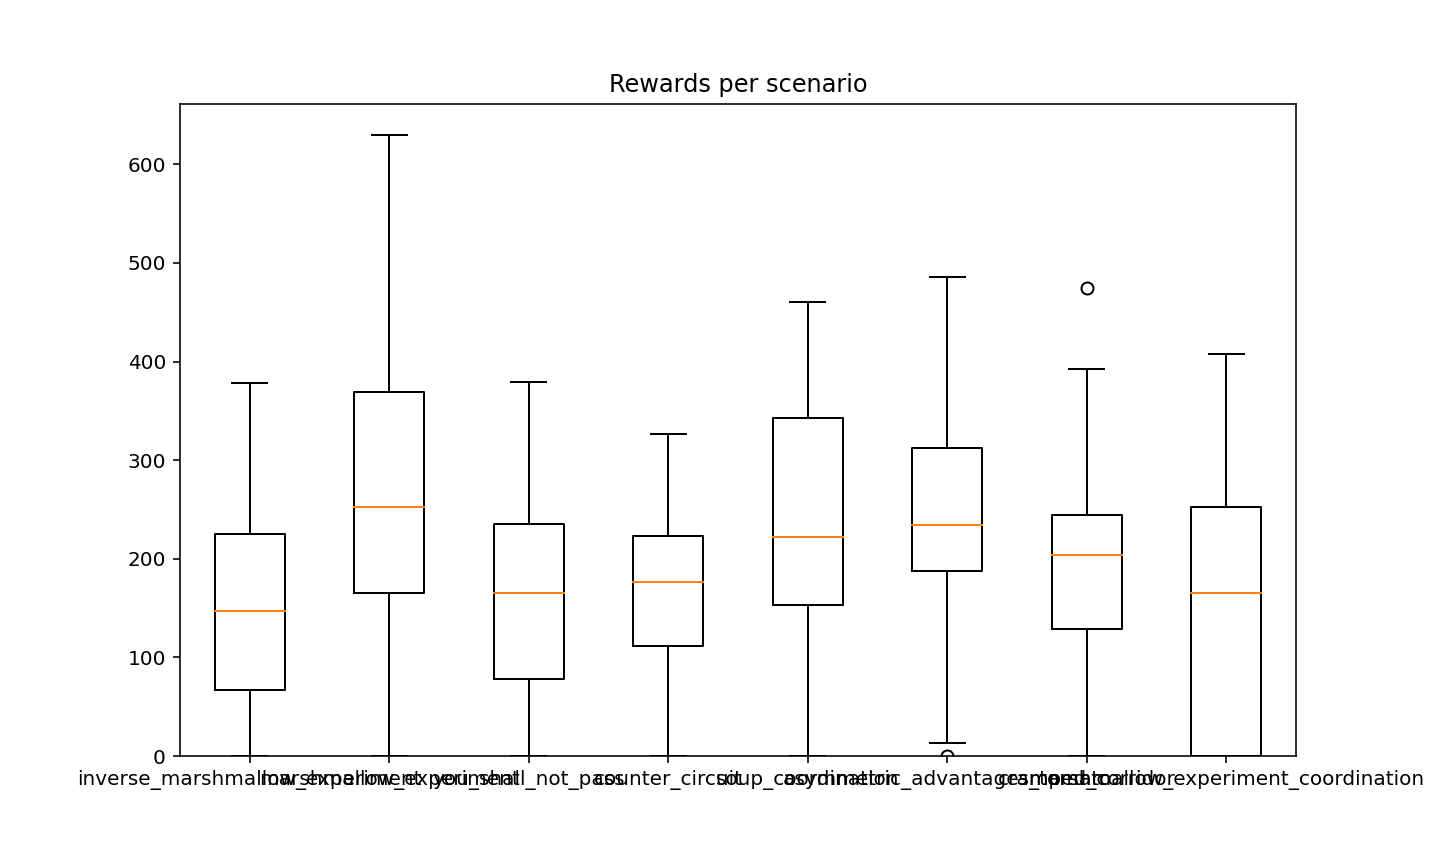

In [39]:
plt.figure(figsize=(10, 6))
plt.title("Rewards per scenario")
plt.boxplot(list(scenario_rews.values()), labels=list(scenario_rews.keys()))
plt.ylim(
    0,
)
plt.show()

### Reward by-worker

In [78]:
get_dict_stats(worker_rews)

{'e1dfeca129874236befaad8d9e481a3e': {'mean': 170.375,
  'standard_error': 35.754343049131805,
  'max': 369,
  'n': 8},
 '6e1413b2cb8544c59eb22023619f2e1a': {'mean': 170.375,
  'standard_error': 35.754343049131805,
  'max': 369,
  'n': 8},
 '6de0d2bfc6dc4be79e05914d4b683efe': {'mean': 321.125,
  'standard_error': 46.27007587928725,
  'max': 543,
  'n': 8},
 '72a6e3c31f3d4fffab55b303fc5be648': {'mean': 321.125,
  'standard_error': 46.27007587928725,
  'max': 543,
  'n': 8},
 '6eeb90a3ecee4c7c9d2c954177bfbc45': {'mean': 240.125,
  'standard_error': 38.26324831839294,
  'max': 408,
  'n': 8},
 '6503606913484adc98a4280b2ddde43b': {'mean': 240.125,
  'standard_error': 38.26324831839294,
  'max': 408,
  'n': 8},
 '15b445e01df24e9b946bed435a07507b': {'mean': 71.375,
  'standard_error': 18.4855834875451,
  'max': 141,
  'n': 8},
 '44cc88f797dd40b09a48a7f711f80acc': {'mean': 71.375,
  'standard_error': 18.4855834875451,
  'max': 141,
  'n': 8},
 '65bd15bcaca64888bdeb2b1caf99d096': {'mean': 268.

In [80]:
all_workers = list(worker_rews.keys())
len(all_workers)

88

<IPython.core.display.Javascript object>


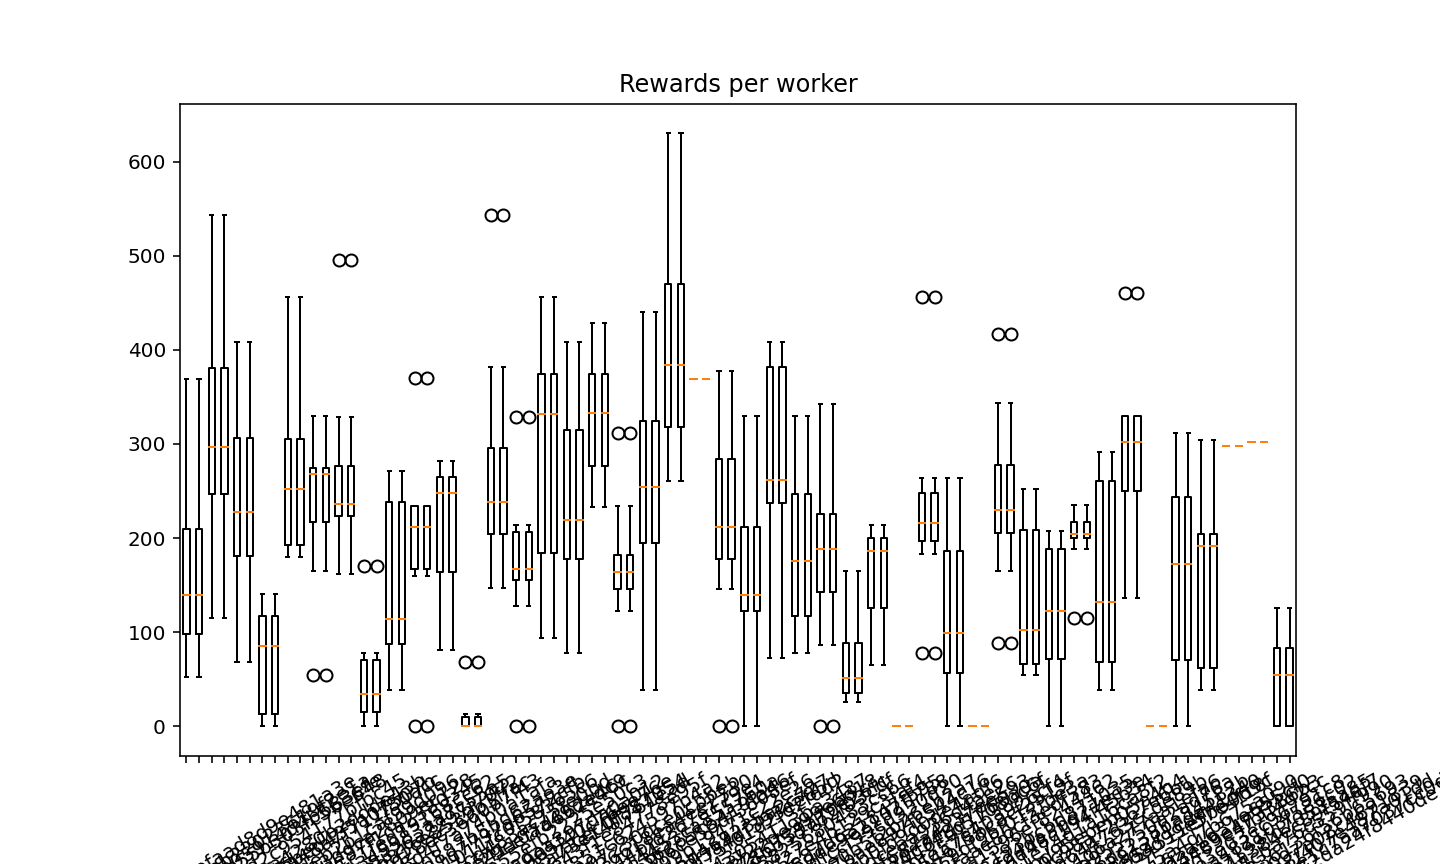

In [81]:
plt.figure(figsize=(10, 6))
plt.title("Rewards per worker")
plt.boxplot(list(worker_rews.values()), labels=list(worker_rews.keys()))
plt.xticks(rotation=30)
plt.show()

### Interactivity Analysis

In [84]:
mean_interactivities = []
mean_time_between_interacts = []
mean_scores = []
for worker in all_workers:
    scores = []
    interactivities = []
    time_between_interacts = []
    worker_trials = np.unique(
        new_main_trials[
            (new_main_trials["player_0_id"] == worker)
            | (new_main_trials["player_1_id"] == worker)
        ]["trial_id"]
    )
    for trial in worker_trials:
        game = new_main_trials[new_main_trials["trial_id"] == trial]
        element = game.iloc[0]
        score = element["score_total"]
        interactivity = element["button_presses_per_timstep"]
        scores.append(score)
        interactivities.append(interactivity)
        time_between_interacts.append(np.mean(game["timesteps_since_interact"]))
    mean_interactivities.append(np.mean(interactivities))
    mean_scores.append(np.mean(scores))
    mean_time_between_interacts.append(np.mean(time_between_interacts))

<IPython.core.display.Javascript object>


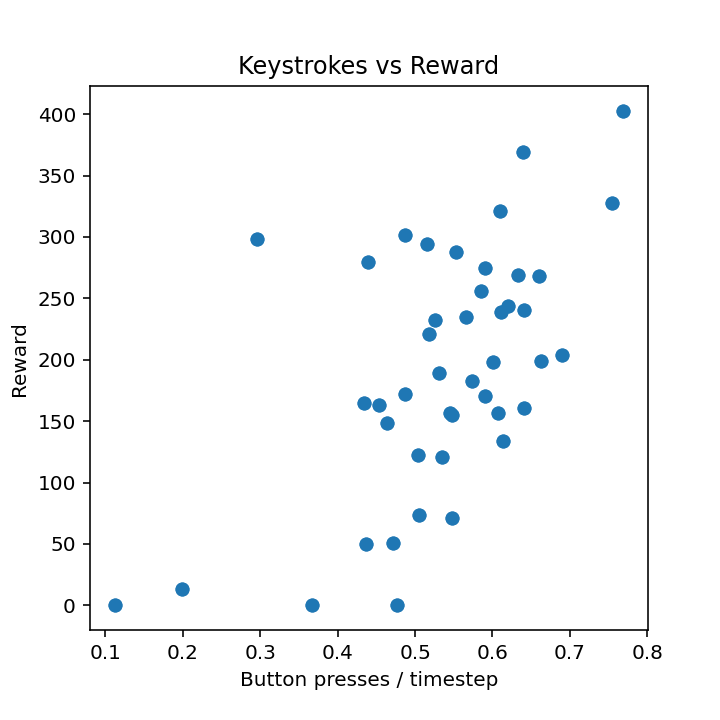

In [85]:
plt.figure(figsize=(5, 5))
plt.scatter(mean_interactivities, mean_scores)
plt.title("Keystrokes vs Reward")
plt.xlabel("Button presses / timestep")
plt.ylabel("Reward")
plt.show()

<IPython.core.display.Javascript object>


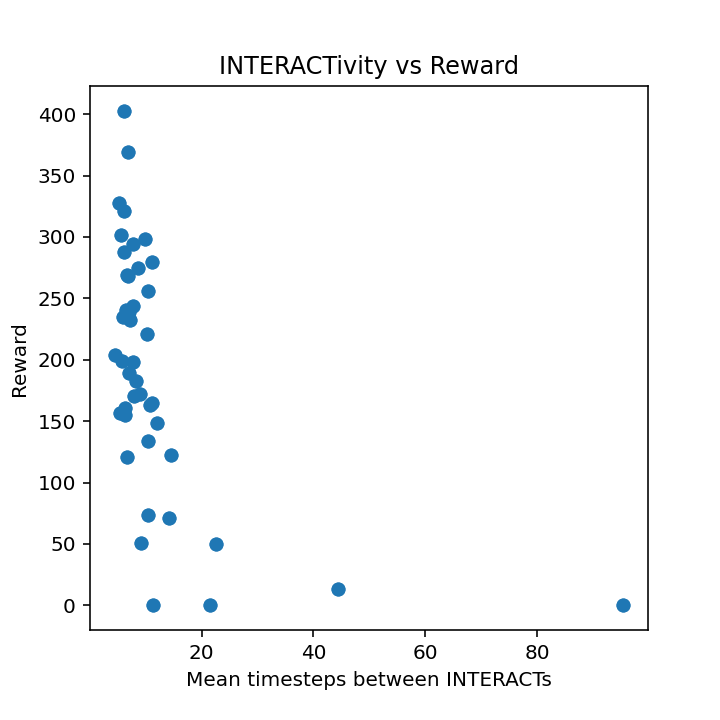

In [86]:
plt.figure(figsize=(5, 5))
plt.scatter(mean_time_between_interacts, mean_scores)
plt.title("INTERACTivity vs Reward")
plt.xlabel("Mean timesteps between INTERACTs")
plt.ylabel("Reward")
plt.show()

In [87]:
def calculate_correlation_coeff(xs, ys):
    cov_mat = np.cov(xs, ys)
    return cov_mat[0, 1] / (np.sqrt(cov_mat[0, 0]) * np.sqrt(cov_mat[1, 1]))

In [88]:
button_score_corr = calculate_correlation_coeff(mean_interactivities, mean_scores)
interact_score_corr = calculate_correlation_coeff(
    mean_time_between_interacts, mean_scores
)

print(
    "Correlation Coefficient between button presses and score: {:.4f}\nCorrelation Coefficient between interactivity and score: {:.4f}".format(
        button_score_corr, interact_score_corr
    )
)

Correlation Coefficient between button presses and score: 0.5870
Correlation Coefficient between interactivity and score: -0.5091


# Filtering + Saving

Button presses per timestep has a slightly higher correlation with score, and appears to have both a better spread and have less outliers than seconds between interacts. Thus, we'll filter on a hand-picked button presses per second threshhold. 

Note that this is pretty ad-hock and oversimplified (more for demonstration) and that the `filter_trials` function accepts an arbitrary filter function to allow the user greater flexibility in data cleaning.

In [2]:
RAW_2019_HUMAN_DATA_PATH = os.path.join(HUMAN_DATA_DIR, "raw", "2019_hh_trials.csv")
csv_to_df_pickle(RAW_2019_HUMAN_DATA_PATH, CLEAN_HUMAN_DATA_DIR, "2019_hh_trials")
csv_to_df_pickle(RAW_HUMAN_DATA_PATH, CLEAN_HUMAN_DATA_DIR, "2020_hh_trials")

Layouts found ['asymmetric_advantages' 'coordination_ring' 'cramped_room' 'random0'
 'random3']
Layouts found ['asymmetric_advantages_tomato' 'counter_circuit' 'cramped_corridor'
 'inverse_marshmallow_experiment' 'marshmallow_experiment'
 'marshmallow_experiment_coordination' 'soup_coordination'
 'you_shall_not_pass']


,state,joint_action,reward,time_left,score,time_elapsed,cur_gameloop,layout,layout_name,trial_id,player_0_id,player_1_id,player_0_is_human,player_1_is_human,cur_gameloop_total,score_total,button_press,button_press_total,timesteps_since_interact,button_presses_per_timstep
104706,"{""players"": [{""position"": [6, 2], ""orientation...","[[0, 0], [0, 0]]",0,59.836342,0,0.163659,1,"[[""X"", ""T"", ""X"", ""X"", ""X"", ""X"", ""X"", ""O"", ""X""]...",asymmetric_advantages_tomato,A107RJSS561Y7R:3Q5ZZ9ZEVTMZAGUKW8V7VOFCWDI85G1...,e1dfeca129874236befaad8d9e481a3e,6e1413b2cb8544c59eb22023619f2e1a,True,True,396,141,0,266,3,0.671717
104707,"{""players"": [{""position"": [6, 2], ""orientation...","[[0, 0], [0, 0]]",0,59.685472,0,0.314530,2,"[[""X"", ""T"", ""X"", ""X"", ""X"", ""X"", ""X"", ""O"", ""X""]...",asymmetric_advantages_tomato,A107RJSS561Y7R:3Q5ZZ9ZEVTMZAGUKW8V7VOFCWDI85G1...,e1dfeca129874236befaad8d9e481a3e,6e1413b2cb8544c59eb22023619f2e1a,True,True,396,141,0,266,4,0.671717
104708,"{""players"": [{""position"": [6, 2], ""orientation...","[[0, 0], [0, 0]]",0,59.534007,0,0.465994,3,"[[""X"", ""T"", ""X"", ""X"", ""X"", ""X"", ""X"", ""O"", ""X""]...",asymmetric_advantages_tomato,A107RJSS561Y7R:3Q5ZZ9ZEVTMZAGUKW8V7VOFCWDI85G1...,e1dfeca129874236befaad8d9e481a3e,6e1413b2cb8544c59eb22023619f2e1a,True,True,396,141,0,266,5,0.671717
104709,"{""players"": [{""position"": [6, 2], ""orientation...","[[0, 0], [0, 0]]",0,59.382854,0,0.617147,4,"[[""X"", ""T"", ""X"", ""X"", ""X"", ""X"", ""X"", ""O"", ""X""]...",asymmetric_advantages_tomato,A107RJSS561Y7R:3Q5ZZ9ZEVTMZAGUKW8V7VOFCWDI85G1...,e1dfeca129874236befaad8d9e481a3e,6e1413b2cb8544c59eb22023619f2e1a,True,True,396,141,0,266,6,0.671717
104710,"{""players"": [{""position"": [6, 2], ""orientation...","[[0, 0], [0, 0]]",0,59.231450,0,0.768551,5,"[[""X"", ""T"", ""X"", ""X"", ""X"", ""X"", ""X"", ""O"", ""X""]...",asymmetric_advantages_tomato,A107RJSS561Y7R:3Q5ZZ9ZEVTMZAGUKW8V7VOFCWDI85G1...,e1dfeca129874236befaad8d9e481a3e,6e1413b2cb8544c59eb22023619f2e1a,True,True,396,141,0,266,7,0.671717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31998,"{""players"": [{""position"": [3, 2], ""orientation...","[[0, 0], [0, 0]]",0,0.720000,195,59.280002,391,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""S"", ""S"", ""S"", ""X"",...",you_shall_not_pass,AMTTB8JUWRRM7:30BXRYBRP94MGAAXVDCMY1LOJA9HWG16...,6d7d42f3a8ad41639e3199fd7053aa85,0d5252afe6c7477e84a384ec89f54af7,True,True,395,195,0,207,1,0.524051
31999,"{""players"": [{""position"": [3, 2], ""orientation...","[[0, 0], [0, 0]]",0,0.568409,195,59.431592,392,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""S"", ""S"", ""S"", ""X"",...",you_shall_not_pass,AMTTB8JUWRRM7:30BXRYBRP94MGAAXVDCMY1LOJA9HWG16...,6d7d42f3a8ad41639e3199fd7053aa85,0d5252afe6c7477e84a384ec89f54af7,True,True,395,195,0,207,2,0.524051
32000,"{""players"": [{""position"": [3, 2], ""orientation...","[[0, 0], [0, 0]]",0,0.416843,195,59.583158,393,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""S"", ""S"", ""S"", ""X"",...",you_shall_not_pass,AMTTB8JUWRRM7:30BXRYBRP94MGAAXVDCMY1LOJA9HWG16...,6d7d42f3a8ad41639e3199fd7053aa85,0d5252afe6c7477e84a384ec89f54af7,True,True,395,195,0,207,3,0.524051
32001,"{""players"": [{""position"": [3, 2], ""orientation...","[[-1, 0], [0, 0]]",0,0.264949,195,59.735053,394,"[[""X"", ""X"", ""X"", ""X"", ""X"", ""S"", ""S"", ""S"", ""X"",...",you_shall_not_pass,AMTTB8JUWRRM7:30BXRYBRP94MGAAXVDCMY1LOJA9HWG16...,6d7d42f3a8ad41639e3199fd7053aa85,0d5252afe6c7477e84a384ec89f54af7,True,True,395,195,1,207,4,0.524051
